# Kgraph and networkX

This notebook demonstrates how the use of the Karsnet, by transforming a karstic network into a graph, also allows to fully analyse the generated KGraph thanks to the NetworkX library.

Aug. 2020


In [1]:
import karstnet as kn

In [2]:
kn.test_kn()

test ok
relance ok


# Simple tree with nodes of degree 2, looping branch and 2 connected components

This exemple introduces a simple 2d graph with a looping branch (nodes 5-9-10), a node of degree 2 (node 14), different cycles and 2 connected components. This permits to test : 
* the computation of tortuosity in case of looping branch (which should be ignored as the real distance is nul between the startin and ending point)
* the functionning of graph simplification (node of degree 2 should disappear)
* the functionning in case of disconnected parts



 This network contains  2  connected components



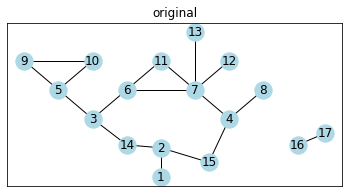

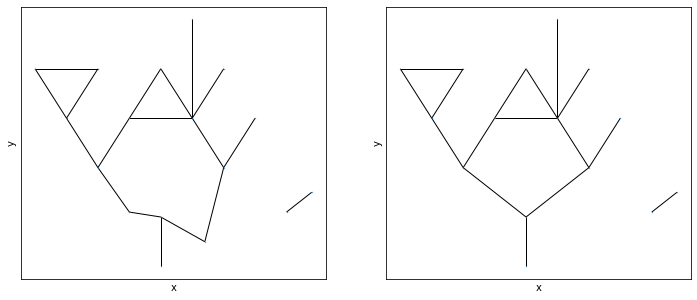

In [3]:
# The dictionary of nodes of the graph
nodes = {1 : (0, 0), 2 : (0, 1), 3 : (-1, 2), 4 : (1, 2),
         5 : (-1.5, 3), 6 : (-0.5, 3), 7 : (0.5, 3), 8 : (1.5, 3),
         9 : (-2, 4), 10 : (-1, 4), 11 : (0, 4), 12 : (1, 4), 13 : (0.5, 5),
         14 : (-0.5,1.1), 15 : (0.7, 0.5),
        16: (2,1.1), 17 : (2.4, 1.5)}

# The list of edges connecting the nodes
edges = [(1, 2), (2, 15), (15,4), (3, 5), (3, 6), (4, 7),(6,7), (6,11),
         (4, 8), (5, 9), (5, 10), (7, 11), (7, 12), (7, 13),(2,14),(14,3),(9,10), (16,17)]


# Creation of an instance k of the KGraph object using karstnet
k = kn.KGraph(edges, nodes)

#Plot 2d graph for checking
k.plot2()
# Plot the original and simplified graphs in 2D top view for checking the simplification
k.plot()



### Let's exploit some possibilities of Networkx library : 
The instance k of the KGraph being generated, two attributes are available wich are both NetworkX objects :
* k.graph : which is the complete graph of the karstic network
* k.graph_simpl : which is the simplified version (without nodes of degree 2) of the karstic network
Thus, all functions and algorithms of NetworkX are, here, applicable (see : https://networkx.github.io/documentation/stable/reference/functions.html)
Let's demonstrate it to you with some examples...

In [4]:
#Compute the number of nodes
nb_nodes = k.graph.number_of_nodes()
nb_nodes_simple = k.graph_simpl.number_of_nodes()
print ("Number of nodes in the complete graph : ", nb_nodes,
      "\nNumber of nodes in the simplified graph : ", nb_nodes_simple)

Number of nodes in the complete graph :  17 
Number of nodes in the simplified graph :  15


In [5]:
#Compute the number of edges
nb_edges = k.graph.number_of_edges()
nb_edges_simple = k.graph_simpl.number_of_edges()
print ("Number of edges in the complete graph : ", nb_edges,
      "\nNumber of edges in the simplified graph : ", nb_edges_simple)

Number of edges in the complete graph :  18 
Number of edges in the simplified graph :  16


In [6]:
#Compute the density
import networkx as nx
dens = nx.density(k.graph)
print("Density", dens)
#dens = k.graph.density()
#dens_simple = k.graph_simpl.density()
#print ("Number of edges in the complete graph : ", dens,
 #     "\nNumber of edges in the simplified graph : ", dens_simple)

Density 0.1323529411764706


In [7]:
#Number of selfloop
import networkx as nx
nb_selfloops = nx.number_of_selfloops(k.graph)
print("Number of selfloops", nb_selfloops)

Number of selfloops 0


#### Connectivity 

In [8]:
# Number of connected components
nb_connected_components = nx.number_connected_components(k.graph)
print ("nb of connected components : ", nb_connected_components)

nb of connected components :  2


In [9]:
#number of cycles : nb_edges - nb_nodes + nb_connected_components
nb_cycles = nb_edges - nb_nodes + nb_connected_components
print ("nb of cycles : ", nb_cycles)

nb of cycles :  3


## Computing Howard's parameters
All basic networks analysis (number of edges, connected components, cycles, extremities and junction nodes) and the three Howard's parameters (alpha, beta, gamma) as defined in : Howard, A. D., Keetch, M. E., & Vincent, C. L. (1970). Topological and geometrical properties of braided patterns. Water Resources Research, 6(6), 1674–1688, are available thanks to the Karsnet function basic_analysis() :

In [10]:
k.basic_analysis()


 This network contains : 17  nodes (stations)
 18 edges
 2  connected components
 3  cycles
 6 are extremity nodes (entries or exits) and 6 are junction nodes

 Howard's parameter are (Howard, 1970) :  
alpha:  0.15789473684210525 
beta 1.5 
gamma 0.6
